In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import sys

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.simplefilter(action='ignore')


In [50]:
#lets read our dataset
gv_data = pd.read_csv("C:/Users/hhira/Documents/Projects/GV/gv_final_data.V2.csv")

In [51]:
%%HTML
<style type="text/css">
table.dataframe td, table.dataframe th {
    border: 1px black solid !important;
  color: black !important;
}

In [52]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",100)
pd.get_option("display.max_rows")


100

In [53]:
gv_data.head()

,index,date,state,city_or_county,address,location_reference,latitude,longitude,qty_guns,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,AG7,AG8,AG9,AG10,AG11,AG12,AG13,AG14,AG15,AG16,AG17,AG18,AG19,AG20,AG21,AG22,AG23,AG24,AG25,AG26,AG27,AG28,AG29,AG30,AG31,AG32,AG33,AG34,AG35,GEN1,GEN2,GEN3,GEN4,GEN5,GEN6,GEN7,GEN8,GEN9,GEN10,GEN11,GEN12,GEN13,GEN14,GEN15,GEN16,GEN17,GEN18,GEN19,GEN20,GEN21,GEN22,GEN23,GEN24,GEN25,GEN26,GEN27,GEN28,GEN29,GEN30,GEN31,GEN32,GEN33,GEN34,GEN35,GEN36,GEN37,GEN38,GEN39,GEN40,GEN41,GEN42,GEN43,GEN44,GEN45,GEN46,GEN47,GEN48,GEN49,GEN50,GEN51,GEN52,GEN53,GEN54,GEN55,GEN56,GEN57,GEN58,GEN59,GEN60,GEN61,GEN62,GEN63,GEN64,GEN65,GEN66,GEN67,GEN68,GEN69,GEN70,GEN71,GEN72,GEN73,GEN74,GEN75,GEN76,GEN77,GEN78,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,AGE11,AGE12,AGE13,AGE14,AGE15,AGE16,AGE17,AGE18,AGE19,AGE20,AGE21,AGE22,AGE23,AGE24,AGE25,AGE26,AGE27,AGE28,AGE29,AGE30,AGE31,AGE32,AGE33,AGE34,AGE35,AGE36,AGE37,AGE38,AGE39,AGE40,AGE41,AGE42,AGE43,AGE44,AGE45,AGE46,AGE47,AGE48,AGE49,AGE50,AGE51,AGE52,AGE53,AGE54,AGE55,AGE56,AGE57,AGE58,AGE59,AGE60,AGE61,AGE62,AGE63,AGE64,AGE65,AGE66,AGE67,AGE68,AGE69,AGE70,AGE71,AGE72,AGE73,AGE74,AGE75,AGE76,AGE77,AGE78,AGE79,AGE80
0,1,41275,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,NaN,40.3467,-79.8559,NaN,0,4,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,MALE,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,41275,California,Hawthorne,13500 block of Cerise Avenue,NaN,33.9090,-118.3330,NaN,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,41275,Ohio,Lorain,1776 East 28th Street,Cotton Club,41.4455,-82.1377,2.0,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,MALE,MALE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,31.0,33.0,34.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,41279,Colorado,Aurora,16000 block of East Ithaca Place,NaN,39.6518,-104.8020,NaN,4,0,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [54]:
gv_data.shape

(239677, 205)

In [55]:
gv_data.tail()

,index,date,state,city_or_county,address,location_reference,latitude,longitude,qty_guns,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,AG7,AG8,AG9,AG10,AG11,AG12,AG13,AG14,AG15,AG16,AG17,AG18,AG19,AG20,AG21,AG22,AG23,AG24,AG25,AG26,AG27,AG28,AG29,AG30,AG31,AG32,AG33,AG34,AG35,GEN1,GEN2,GEN3,GEN4,GEN5,GEN6,GEN7,GEN8,GEN9,GEN10,GEN11,GEN12,GEN13,GEN14,GEN15,GEN16,GEN17,GEN18,GEN19,GEN20,GEN21,GEN22,GEN23,GEN24,GEN25,GEN26,GEN27,GEN28,GEN29,GEN30,GEN31,GEN32,GEN33,GEN34,GEN35,GEN36,GEN37,GEN38,GEN39,GEN40,GEN41,GEN42,GEN43,GEN44,GEN45,GEN46,GEN47,GEN48,GEN49,GEN50,GEN51,GEN52,GEN53,GEN54,GEN55,GEN56,GEN57,GEN58,GEN59,GEN60,GEN61,GEN62,GEN63,GEN64,GEN65,GEN66,GEN67,GEN68,GEN69,GEN70,GEN71,GEN72,GEN73,GEN74,GEN75,GEN76,GEN77,GEN78,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,AGE11,AGE12,AGE13,AGE14,AGE15,AGE16,AGE17,AGE18,AGE19,AGE20,AGE21,AGE22,AGE23,AGE24,AGE25,AGE26,AGE27,AGE28,AGE29,AGE30,AGE31,AGE32,AGE33,AGE34,AGE35,AGE36,AGE37,AGE38,AGE39,AGE40,AGE41,AGE42,AGE43,AGE44,AGE45,AGE46,AGE47,AGE48,AGE49,AGE50,AGE51,AGE52,AGE53,AGE54,AGE55,AGE56,AGE57,AGE58,AGE59,AGE60,AGE61,AGE62,AGE63,AGE64,AGE65,AGE66,AGE67,AGE68,AGE69,AGE70,AGE71,AGE72,AGE73,AGE74,AGE75,AGE76,AGE77,AGE78,AGE79,AGE80
239672,239673,43190,Louisiana,Rayne,North Riceland Road and Highway 90,NaN,NaN,NaN,1.0,0,0,0,239673,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239673,239674,43190,Louisiana,Natchitoches,247 Keyser Ave,Shop Rite,31.7537,-93.0836,1.0,1,0,1,239674,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239674,239675,43190,Louisiana,Gretna,1300 block of Cook Street,NaN,29.9239,-90.0442,1.0,0,1,1,239675,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
239675,239676,43190,Texas,Houston,12630 Ashford Point Dr,Vanderbilt Court apartments,29.7201,-95.6110,1.0,1,0,1,239676,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [56]:
gv_data.describe()

,index,date,latitude,longitude,qty_guns,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,AG7,AG8,AG9,AG10,AG11,AG12,AG13,AG14,AG15,AG16,AG17,AG18,AG19,AG20,AG21,AG22,AG23,AG24,AG25,AG26,AG27,AG28,AG29,AG30,AG31,AG32,AG33,AG34,AG35,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,AGE11,AGE12,AGE13,AGE14,AGE15,AGE16,AGE17,AGE18,AGE19,AGE20,AGE21,AGE22,AGE23,AGE24,AGE25,AGE26,AGE27,AGE28,AGE29,AGE30,AGE31,AGE32,AGE33,AGE34,AGE35,AGE36,AGE37,AGE38,AGE39,AGE40,AGE41,AGE42,AGE43,AGE44,AGE45,AGE46,AGE47,AGE48,AGE49,AGE50,AGE51,AGE52,AGE53,AGE54,AGE55,AGE56,AGE57,AGE58,AGE59,AGE60,AGE61,AGE62,AGE63,AGE64,AGE65,AGE66,AGE67,AGE68,AGE69,AGE70,AGE71,AGE72,AGE73,AGE74,AGE75,AGE76,AGE77,AGE78,AGE79,AGE80
count,239677.000000,239677.000000,231754.000000,231754.000000,140226.000000,239677.000000,239677.000000,239677.000000,239677.000000,197569.000000,88504.000000,29952.000000,11746.000000,4726.000000,1795.000000,813.000000,417.000000,231.000000,146.000000,101.000000,73.000000,61.000000,50.000000,43.000000,37.000000,34.000000,30.0,26.000000,23.000000,19.000000,18.000000,15.000000,15.0,13.000000,13.000000,11.000000,10.000000,9.000000,7.000000,6.000000,6.00000,5.000000,4.0,146131.000000,49744.000000,14277.000000,5190.000000,1972.000000,767.000000,376.000000,219.000000,127.000000,78.000000,58.000000,45.000000,38.000000,30.000000,29.000000,23.000000,21.000000,20.00000,16.000000,15.000000,11.000000,11.000000,9.000000,9.000000,9.000000,7.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.0,2.000000,2.000000,2.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,119839.000000,42442.018283,37.546598,-89.338348,1.372442,0.252290,0.494007,0.746296,119838.904017,2.904985,2.900536,2.871828,2.852631,2.837495,2.825070,2.824108,2.820144,2.852814,2.876712,2.861386,2.890411,2.901639,2.860000,2.930233,2.837838,2.911765,3.0,2.961538,2.956522,2.947368,2.944444,2.866667,3.0,2.923077,2.923077,2.727273,2.900000,2.888889,2.571429,2.833333,2.50000,2.400000,3.0,30.132695,28.780907,25.844282,25.011872,25.133585,25.398957,26.170213,27.716895,27.354331,28.525641,27.551724,28.488889,26.894737,27.633333,29.793103,23.695652,27.333333,32.20000,28.750000,26.333333,30.090909,30.636364,27.222222,32.333333,30.000000,35.000000,25.000000,31.400000,20.000000,31.750000,28.000000,37.750000,27.000000,26.500000,30.500000,23.000000,24.000000,24.0,30.000000,29.500000,38.500000,21.500000,30.50000,24.000000,29.000000,29.500000,34.000000,18.0,28.500000,31.000000,32.000000,33.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,69188.934572,442.827461,5.130763,14.359546,4.678202,0.521779,0.729952,0.842343,69189.100720,0.334624,0.337908,0.377710,0.404309,0.419926,0.442371,0.449202,0.463864,0.401062,0.369350,0.400742,0.355967,0.351422,0.404566,0.337734,0.441809,0.378806,0.0,0.196116,0.208514,0.229416,0.235702,0.351866,0.0,0.277350,0.277350,0.646670,0.316228,0.333333,0.786796,0.408248,0.83666,0.894427,0.0,13.508146,13.193338,10.695664,10.044626,10.045572,10.034140,10.627650,10.488624,11.252180,10.980176,9.457518,11.598633,9.334011,11.158678,12.832379,7.534374,10.841279,13.05696,14.767081,12.505237,12.283766,11.689934,11.099299,14.654351,14.465476,14.514361,13.095801,23.394444,11.860298,7.274384,8.602325,9.945686,2.828427,3.535534,0.707107,2.828427,1.414214,0.0,4.242641,4.949747,14.849242,3.535534,2.12132,5.656854,2.828427,16.263456,7.071068,0.0,4.949747,7.071068,7.071068,4.949747,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,41275.000000,19.111400,-171.429000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0000

In [57]:
#build the datafram
gv_data.drop(['index','date','address','qty_guns'], axis=1,inplace=True)

In [58]:
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,AG7,AG8,AG9,AG10,AG11,AG12,AG13,AG14,AG15,AG16,AG17,AG18,AG19,AG20,AG21,AG22,AG23,AG24,AG25,AG26,AG27,AG28,AG29,AG30,AG31,AG32,AG33,AG34,AG35,GEN1,GEN2,GEN3,GEN4,GEN5,GEN6,GEN7,GEN8,GEN9,GEN10,GEN11,GEN12,GEN13,GEN14,GEN15,GEN16,GEN17,GEN18,GEN19,GEN20,GEN21,GEN22,GEN23,GEN24,GEN25,GEN26,GEN27,GEN28,GEN29,GEN30,GEN31,GEN32,GEN33,GEN34,GEN35,GEN36,GEN37,GEN38,GEN39,GEN40,GEN41,GEN42,GEN43,GEN44,GEN45,GEN46,GEN47,GEN48,GEN49,GEN50,GEN51,GEN52,GEN53,GEN54,GEN55,GEN56,GEN57,GEN58,GEN59,GEN60,GEN61,GEN62,GEN63,GEN64,GEN65,GEN66,GEN67,GEN68,GEN69,GEN70,GEN71,GEN72,GEN73,GEN74,GEN75,GEN76,GEN77,GEN78,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,AGE11,AGE12,AGE13,AGE14,AGE15,AGE16,AGE17,AGE18,AGE19,AGE20,AGE21,AGE22,AGE23,AGE24,AGE25,AGE26,AGE27,AGE28,AGE29,AGE30,AGE31,AGE32,AGE33,AGE34,AGE35,AGE36,AGE37,AGE38,AGE39,AGE40,AGE41,AGE42,AGE43,AGE44,AGE45,AGE46,AGE47,AGE48,AGE49,AGE50,AGE51,AGE52,AGE53,AGE54,AGE55,AGE56,AGE57,AGE58,AGE59,AGE60,AGE61,AGE62,AGE63,AGE64,AGE65,AGE66,AGE67,AGE68,AGE69,AGE70,AGE71,AGE72,AGE73,AGE74,AGE75,AGE76,AGE77,AGE78,AGE79,AGE80
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,MALE,FEMALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,MALE,MALE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,31.0,33.0,34.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,MALE,MALE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

In [59]:
gv_data.columns

Index(['state', 'city_or_county', 'location_reference', 'latitude',
       'longitude', 'killed', 'injured', 'victims', 'AG1', 'AG2',
       ...
       'AGE71', 'AGE72', 'AGE73', 'AGE74', 'AGE75', 'AGE76', 'AGE77', 'AGE78',
       'AGE79', 'AGE80'],
      dtype='object', length=201)

In [60]:
#count empty NaN rows per column
gv_data.isnull().sum().to_frame()

,0
state,0
city_or_county,0
location_reference,197588
latitude,7923
longitude,7923
...,...
AGE76,239677
AGE77,239677
AGE78,239677
AGE79,239677


In [61]:
index_no = gv_data.columns.get_loc('GEN3')
print(index_no)

45


In [62]:
index_no = gv_data.columns.get_loc('GEN78')
print(index_no)

120


In [63]:
#drop the range of columns corresponding indexes
gv_data.drop(gv_data.iloc[:,45:117], axis=1,inplace=True)

In [64]:
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,AG7,AG8,AG9,AG10,AG11,AG12,AG13,AG14,AG15,AG16,AG17,AG18,AG19,AG20,AG21,AG22,AG23,AG24,AG25,AG26,AG27,AG28,AG29,AG30,AG31,AG32,AG33,AG34,AG35,GEN1,GEN2,GEN75,GEN76,GEN77,GEN78,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,AGE11,AGE12,AGE13,AGE14,AGE15,AGE16,AGE17,AGE18,AGE19,AGE20,AGE21,AGE22,AGE23,AGE24,AGE25,AGE26,AGE27,AGE28,AGE29,AGE30,AGE31,AGE32,AGE33,AGE34,AGE35,AGE36,AGE37,AGE38,AGE39,AGE40,AGE41,AGE42,AGE43,AGE44,AGE45,AGE46,AGE47,AGE48,AGE49,AGE50,AGE51,AGE52,AGE53,AGE54,AGE55,AGE56,AGE57,AGE58,AGE59,AGE60,AGE61,AGE62,AGE63,AGE64,AGE65,AGE66,AGE67,AGE68,AGE69,AGE70,AGE71,AGE72,AGE73,AGE74,AGE75,AGE76,AGE77,AGE78,AGE79,AGE80
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,NaN,NaN,NaN,NaN,25.0,31.0,33.0,34.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,NaN,NaN,NaN,NaN,29.0,33.0,56.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,NaN,NaN,NaN,NaN,18.0,46.0,14.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
#count empty NaN rows per column
gv_data.isnull().sum().to_frame()

,0
state,0
city_or_county,0
location_reference,197588
latitude,7923
longitude,7923
...,...
AGE76,239677
AGE77,239677
AGE78,239677
AGE79,239677


In [66]:
#drop AGE6 to AGE80
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,AG7,AG8,AG9,AG10,AG11,AG12,AG13,AG14,AG15,AG16,AG17,AG18,AG19,AG20,AG21,AG22,AG23,AG24,AG25,AG26,AG27,AG28,AG29,AG30,AG31,AG32,AG33,AG34,AG35,GEN1,GEN2,GEN75,GEN76,GEN77,GEN78,AGE1,AGE2,AGE3,AGE4,AGE5,AGE6,AGE7,AGE8,AGE9,AGE10,AGE11,AGE12,AGE13,AGE14,AGE15,AGE16,AGE17,AGE18,AGE19,AGE20,AGE21,AGE22,AGE23,AGE24,AGE25,AGE26,AGE27,AGE28,AGE29,AGE30,AGE31,AGE32,AGE33,AGE34,AGE35,AGE36,AGE37,AGE38,AGE39,AGE40,AGE41,AGE42,AGE43,AGE44,AGE45,AGE46,AGE47,AGE48,AGE49,AGE50,AGE51,AGE52,AGE53,AGE54,AGE55,AGE56,AGE57,AGE58,AGE59,AGE60,AGE61,AGE62,AGE63,AGE64,AGE65,AGE66,AGE67,AGE68,AGE69,AGE70,AGE71,AGE72,AGE73,AGE74,AGE75,AGE76,AGE77,AGE78,AGE79,AGE80
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,26.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,NaN,NaN,NaN,NaN,25.0,31.0,33.0,34.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,NaN,NaN,NaN,NaN,29.0,33.0,56.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,NaN,NaN,NaN,NaN,18.0,46.0,14.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
index_no = gv_data.columns.get_loc('AGE80')
print(index_no)

128


In [68]:
index_no = gv_data.columns.get_loc('AGE5')
print(index_no)

53


In [69]:
#drop the range of columns corresponding  index
gv_data.drop(gv_data.iloc[:,54:129], axis=1,inplace=True)

In [70]:
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,AG7,AG8,AG9,AG10,AG11,AG12,AG13,AG14,AG15,AG16,AG17,AG18,AG19,AG20,AG21,AG22,AG23,AG24,AG25,AG26,AG27,AG28,AG29,AG30,AG31,AG32,AG33,AG34,AG35,GEN1,GEN2,GEN75,GEN76,GEN77,GEN78,AGE1,AGE2,AGE3,AGE4,AGE5
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,NaN
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,26.0
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MALE,MALE,NaN,NaN,NaN,NaN,25.0,31.0,33.0,34.0,33.0
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,NaN,NaN,NaN,NaN,29.0,33.0,56.0,33.0,NaN
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,3.0,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FEMALE,MALE,NaN,NaN,NaN,NaN,18.0,46.0,14.0,47.0,NaN


In [71]:
index_no = gv_data.columns.get_loc('AG7')
print(index_no)

14


In [72]:
index_no = gv_data.columns.get_loc('AG35')
print(index_no)

42


In [73]:
#drop the range of columns corresponding  index
gv_data.drop(gv_data.iloc[:,14:43], axis=1,inplace=True)

In [74]:
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,GEN1,GEN2,GEN75,GEN76,GEN77,GEN78,AGE1,AGE2,AGE3,AGE4,AGE5
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,3.0,3.0,3.0,3.0,MALE,MALE,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,NaN
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,3.0,3.0,3.0,3.0,MALE,NaN,NaN,NaN,NaN,NaN,20.0,25.0,25.0,25.0,26.0
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,3.0,3.0,3.0,3.0,MALE,MALE,NaN,NaN,NaN,NaN,25.0,31.0,33.0,34.0,33.0
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,3.0,3.0,3.0,3.0,FEMALE,MALE,NaN,NaN,NaN,NaN,29.0,33.0,56.0,33.0,NaN
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,3.0,3.0,3.0,3.0,FEMALE,MALE,NaN,NaN,NaN,NaN,18.0,46.0,14.0,47.0,NaN


In [75]:
index_no = gv_data.columns.get_loc('GEN75')
print(index_no)

16


In [76]:
index_no = gv_data.columns.get_loc('GEN78')
print(index_no)

19


In [77]:
#drop the range of columns corresponding  index
gv_data.drop(gv_data.iloc[:,16:20], axis=1,inplace=True)

In [78]:
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AG3,AG4,AG5,AG6,GEN1,GEN2,AGE1,AGE2,AGE3,AGE4,AGE5
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,3.0,3.0,3.0,3.0,MALE,MALE,20.0,25.0,25.0,25.0,NaN
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,3.0,3.0,3.0,3.0,MALE,NaN,20.0,25.0,25.0,25.0,26.0
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,3.0,3.0,3.0,3.0,MALE,MALE,25.0,31.0,33.0,34.0,33.0
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,3.0,3.0,3.0,3.0,FEMALE,MALE,29.0,33.0,56.0,33.0,NaN
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,3.0,3.0,3.0,3.0,FEMALE,MALE,18.0,46.0,14.0,47.0,NaN


In [79]:
#count empty NaN rows per column
gv_data.isnull().sum().to_frame()

,0
state,0
city_or_county,0
location_reference,197588
latitude,7923
longitude,7923
killed,0
injured,0
victims,0
AG1,0
AG2,42108


In [80]:
#drop columns
#drop columns that are missing most of the data AG6 to AG35
gv_data.drop(['AG3','AG4','AG5','AGE2','AGE3','AGE4','AGE5'],axis=1,inplace=True)


In [81]:
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AG6,GEN1,GEN2,AGE1
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,3.0,MALE,MALE,20.0
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,3.0,MALE,NaN,20.0
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,3.0,MALE,MALE,25.0
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,3.0,FEMALE,MALE,29.0
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,3.0,FEMALE,MALE,18.0


In [82]:
#count empty NaN rows per column
gv_data.isnull().sum().to_frame()

,0
state,0
city_or_county,0
location_reference,197588
latitude,7923
longitude,7923
killed,0
injured,0
victims,0
AG1,0
AG2,42108


In [83]:
gv_data.drop(['AG6'],axis=1,inplace=True)

In [84]:
gv_data.head()

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,GEN1,GEN2,AGE1
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,MALE,MALE,20.0
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,MALE,NaN,20.0
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,MALE,MALE,25.0
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,FEMALE,MALE,29.0
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,FEMALE,MALE,18.0


In [85]:
gv_data.describe()

,latitude,longitude,killed,injured,victims,AG1,AG2,AGE1
count,231754.000000,231754.000000,239677.000000,239677.000000,239677.000000,239677.000000,197569.000000,146131.000000
mean,37.546598,-89.338348,0.252290,0.494007,0.746296,119838.904017,2.904985,30.132695
std,5.130763,14.359546,0.521779,0.729952,0.842343,69189.100720,0.334624,13.508146
min,19.111400,-171.429000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,33.903400,-94.158725,0.000000,0.000000,0.000000,59920.000000,3.000000,21.000000
50%,38.570600,-86.249600,0.000000,0.000000,1.000000,119839.000000,3.000000,27.000000
75%,41.437375,-80.048625,0.000000,1.000000,1.000000,179758.000000,3.000000,36.000000
max,71.336800,97.433100,50.000000,53.000000,103.000000,239677.000000,3.000000,311.000000


In [86]:
age_median=gv_data['AGE1'].median()
print(age_median)

27.0


In [87]:
gv_data['AGE1'].fillna(value=age_median, inplace=True)

In [88]:
#dummies
gunviolence = pd.get_dummies(gv_data,columns=['GEN1','GEN2'])

In [89]:
gunviolence

,state,city_or_county,location_reference,latitude,longitude,killed,injured,victims,AG1,AG2,AGE1,GEN1_FEMALE,GEN1_MALE,GEN2_FEMALE,GEN2_MALE
0,Pennsylvania,Mckeesport,NaN,40.3467,-79.8559,0,4,4,1,3.0,20.0,0,1,0,1
1,California,Hawthorne,NaN,33.9090,-118.3330,1,3,4,1,3.0,20.0,0,1,0,0
2,Ohio,Lorain,Cotton Club,41.4455,-82.1377,1,3,4,1,3.0,25.0,0,1,0,1
3,Colorado,Aurora,NaN,39.6518,-104.8020,4,0,4,1,3.0,29.0,1,0,0,1
4,North Carolina,Greensboro,NaN,36.1140,-79.9569,2,2,4,1,3.0,18.0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,Louisiana,Rayne,NaN,NaN,NaN,0,0,0,239673,3.0,25.0,1,0,0,0
239673,Louisiana,Natchitoches,Shop Rite,31.7537,-93.0836,1,0,1,239674,3.0,21.0,0,1,0,1
239674,Louisiana,Gretna,NaN,29.9239,-90.0442,0,1,1,239675,3.0,21.0,0,1,0,0
239675,Texas,Houston,Vanderbilt Court apartments,29.7201,-95.6110,1,0,1,239676,3.0,42.0,0,1,0,0


In [90]:
gunviolence.drop(['AG1','AG2'],axis=1,inplace=True)

In [91]:
#dummies
#gunviolence_df = pd.get_dummies(gunviolence,columns=['STATE'])

In [92]:
gunviolence.drop(['state','city_or_county','location_reference'],axis=1,inplace=True)

In [93]:
gunviolence.describe()

,latitude,longitude,killed,injured,victims,AGE1,GEN1_FEMALE,GEN1_MALE,GEN2_FEMALE,GEN2_MALE
count,231754.000000,231754.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000,239677.000000
mean,37.546598,-89.338348,0.252290,0.494007,0.746296,28.910003,0.105859,0.894141,0.055149,0.343608
std,5.130763,14.359546,0.521779,0.729952,0.842343,10.657719,0.307658,0.307658,0.228272,0.474913
min,19.111400,-171.429000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,0.000000,0.000000,0.000000,24.000000,0.000000,1.000000,0.000000,0.000000
50%,38.570600,-86.249600,0.000000,0.000000,1.000000,27.000000,0.000000,1.000000,0.000000,0.000000
75%,41.437375,-80.048625,0.000000,1.000000,1.000000,30.000000,0.000000,1.000000,0.000000,1.000000
max,71.336800,97.433100,50.000000,53.000000,103.000000,311.000000,1.000000,1.000000,1.000000,1.000000


In [94]:
from tensorflow.keras import models, layers, utils, backend as K
import matplotlib.pyplot as plt
import shap

In [95]:
model = models.Sequential(name="Perceptron", layers=[
    layers.Dense(             #a fully connected layer
          name="dense",
          input_dim=3,        #with 3 features as the input
          units=1,            #and 1 node because we want 1 output
          activation='linear' #f(x)=x
    )
])
model.summary()

Model: "Perceptron"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [96]:
# define the function

import tensorflow as tf
def binary_step_activation(x):
    ##return 1 if x>0 else 0 
    return K.switch(x>0, tf.math.divide(x,x), tf.math.multiply(x,0))

# build the model
model = models.Sequential(name="Perceptron", layers=[
      layers.Dense(             
          name="dense",
          input_dim=3,        
          units=1,            
          activation=binary_step_activation
      )
])

In [97]:
n_features = 10
model = models.Sequential(name="DeepNN", layers=[
    ### hidden layer 1
    layers.Dense(name="h1", input_dim=n_features,
                 units=int(round((n_features+1)/2)), 
                 activation='relu'),
    layers.Dropout(name="drop1", rate=0.2),
    
    ### hidden layer 2
    layers.Dense(name="h2", units=int(round((n_features+1)/4)), 
                 activation='relu'),
    layers.Dropout(name="drop2", rate=0.2),
    
    ### layer output
    layers.Dense(name="output", units=1, activation='sigmoid')
])
model.summary()

Model: "DeepNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 h1 (Dense)                  (None, 6)                 66        
                                                                 
 drop1 (Dropout)             (None, 6)                 0         
                                                                 
 h2 (Dense)                  (None, 3)                 21        
                                                                 
 drop2 (Dropout)             (None, 3)                 0         
                                                                 
 output (Dense)              (None, 1)                 4         
                                                                 
Total params: 91
Trainable params: 91
Non-trainable params: 0
_________________________________________________________________


In [98]:
# Perceptron
inputs = layers.Input(name="input", shape=(3,))
outputs = layers.Dense(name="output", units=1, 
                       activation='linear')(inputs)
model = models.Model(inputs=inputs, outputs=outputs, 
                     name="Perceptron")

# DeepNN
### layer input
inputs = layers.Input(name="input", shape=(n_features,))

### hidden layer 1
h1 = layers.Dense(name="h1", units=int(round((n_features+1)/2)), activation='relu')(inputs)
h1 = layers.Dropout(name="drop1", rate=0.2)(h1)

### hidden layer 2
h2 = layers.Dense(name="h2", units=int(round((n_features+1)/4)), activation='relu')(h1)
h2 = layers.Dropout(name="drop2", rate=0.2)(h2)

### layer output
outputs = layers.Dense(name="output", units=1, activation='sigmoid')(h2)

model = models.Model(inputs=inputs, outputs=outputs, name="DeepNN")

In [99]:
'''
Extract info for each layer in a keras model.
'''
def utils_nn_config(model):
    lst_layers = []
    if "Sequential" in str(model): #-> Sequential doesn't show the input layer
        layer = model.layers[0]
        lst_layers.append({"name":"input", "in":int(layer.input.shape[-1]), "neurons":0, 
                           "out":int(layer.input.shape[-1]), "activation":None,
                           "params":0, "bias":0})
    for layer in model.layers:
        try:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":layer.units, 
                         "out":int(layer.output.shape[-1]), "activation":layer.get_config()["activation"],
                         "params":layer.get_weights()[0], "bias":layer.get_weights()[1]}
        except:
            dic_layer = {"name":layer.name, "in":int(layer.input.shape[-1]), "neurons":0, 
                         "out":int(layer.output.shape[-1]), "activation":None,
                         "params":0, "bias":0}
        lst_layers.append(dic_layer)
    return lst_layers



'''
Plot the structure of a keras neural network.
'''
def visualize_nn(model, description=False, figsize=(10,8)):
    ## get layers info
    lst_layers = utils_nn_config(model)
    layer_sizes = [layer["out"] for layer in lst_layers]
    
    ## fig setup
    fig = plt.figure(figsize=figsize)
    ax = fig.gca()
    ax.set(title=model.name)
    ax.axis('off')
    left, right, bottom, top = 0.1, 0.9, 0.1, 0.9
    x_space = (right-left) / float(len(layer_sizes)-1)
    y_space = (top-bottom) / float(max(layer_sizes))
    p = 0.025
    
    ## nodes
    for i,n in enumerate(layer_sizes):
        top_on_layer = y_space*(n-1)/2.0 + (top+bottom)/2.0
        layer = lst_layers[i]
        color = "green" if i in [0, len(layer_sizes)-1] else "blue"
        color = "red" if (layer['neurons'] == 0) and (i > 0) else color
        
        ### add description
        if (description is True):
            d = i if i == 0 else i-0.5
            if layer['activation'] is None:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
            else:
                plt.text(x=left+d*x_space, y=top, fontsize=10, color=color, s=layer["name"].upper())
                plt.text(x=left+d*x_space, y=top-p, fontsize=10, color=color, s=layer['activation']+" (")
                plt.text(x=left+d*x_space, y=top-2*p, fontsize=10, color=color, s="Σ"+str(layer['in'])+"[X*w]+b")
                out = " Y"  if i == len(layer_sizes)-1 else " out"
                plt.text(x=left+d*x_space, y=top-3*p, fontsize=10, color=color, s=") = "+str(layer['neurons'])+out)
        
        ### circles
        for m in range(n):
            color = "limegreen" if color == "green" else color
            circle = plt.Circle(xy=(left+i*x_space, top_on_layer-m*y_space-4*p), radius=y_space/4.0, color=color, ec='k', zorder=4)
            ax.add_artist(circle)
            
            ### add text
            if i == 0:
                plt.text(x=left-4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$X_{'+str(m+1)+'}$')
            elif i == len(layer_sizes)-1:
                plt.text(x=right+4*p, y=top_on_layer-m*y_space-4*p, fontsize=10, s=r'$y_{'+str(m+1)+'}$')
            else:
                plt.text(x=left+i*x_space+p, y=top_on_layer-m*y_space+(y_space/8.+0.01*y_space)-4*p, fontsize=10, s=r'$H_{'+str(m+1)+'}$')
    
    ## links
    for i, (n_a, n_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer = lst_layers[i+1]
        color = "green" if i == len(layer_sizes)-2 else "blue"
        color = "red" if layer['neurons'] == 0 else color
        layer_top_a = y_space*(n_a-1)/2. + (top+bottom)/2. -4*p
        layer_top_b = y_space*(n_b-1)/2. + (top+bottom)/2. -4*p
        for m in range(n_a):
            for o in range(n_b):
                line = plt.Line2D([i*x_space+left, (i+1)*x_space+left], 
                                  [layer_top_a-m*y_space, layer_top_b-o*y_space], 
                                  c=color, alpha=0.5)
                if layer['activation'] is None:
                    if o == m:
                        ax.add_artist(line)
                else:
                    ax.add_artist(line)
    plt.show()

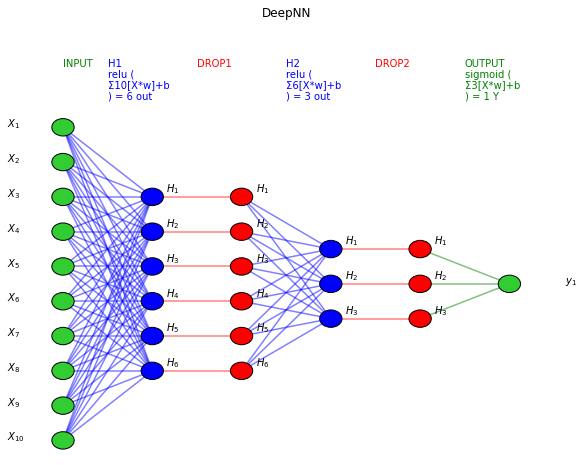

In [100]:
visualize_nn(model, description=True, figsize=(10,8))

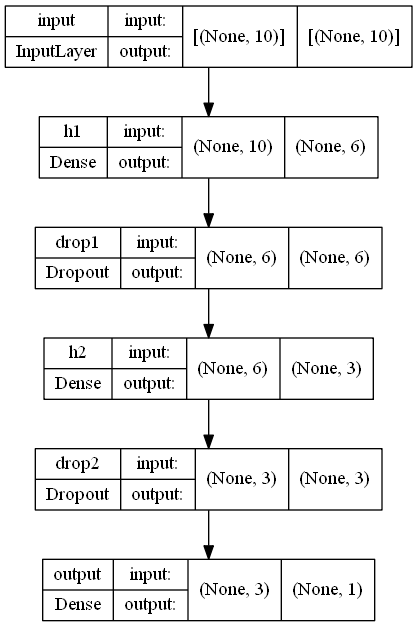

In [101]:
import graphviz

utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [102]:
# define metrics
def R2(y, y_hat):
    ss_res =  K.sum(K.square(y - y_hat)) 
    ss_tot = K.sum(K.square(y - K.mean(y))) 
    return ( 1 - ss_res/(ss_tot + K.epsilon()) )

# compile the neural network
model.compile(optimizer='adam', loss='mean_absolute_error', 
              metrics=[R2])

In [103]:
X = np.random.rand(1000,10)
y = np.random.choice([1,0], size=1000)

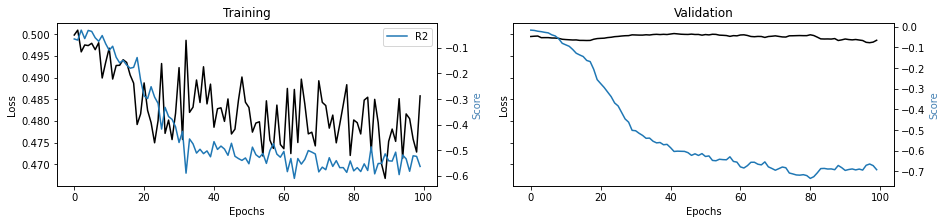

In [104]:
# train/validation
training = model.fit(x=X, y=y, batch_size=32, epochs=100, shuffle=True, verbose=0, validation_split=0.3)

# plot
metrics = [k for k in training.history.keys() if ("loss" not in k) and ("val" not in k)]    
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15,3))
       
## training    
ax[0].set(title="Training")    
ax11 = ax[0].twinx()    
ax[0].plot(training.history['loss'], color='black')
ax[0].set_xlabel('Epochs')    
ax[0].set_ylabel('Loss', color='black')    
for metric in metrics:        
    ax11.plot(training.history[metric], label=metric)
ax11.set_ylabel("Score", color='steelblue')    
ax11.legend()
        
## validation    
ax[1].set(title="Validation")    
ax22 = ax[1].twinx()    
ax[1].plot(training.history['val_loss'], color='black')
ax[1].set_xlabel('Epochs')    
ax[1].set_ylabel('Loss', color='black')    
for metric in metrics:          
    ax22.plot(training.history['val_'+metric], label=metric)
ax22.set_ylabel("Score", color="steelblue")    
plt.show()